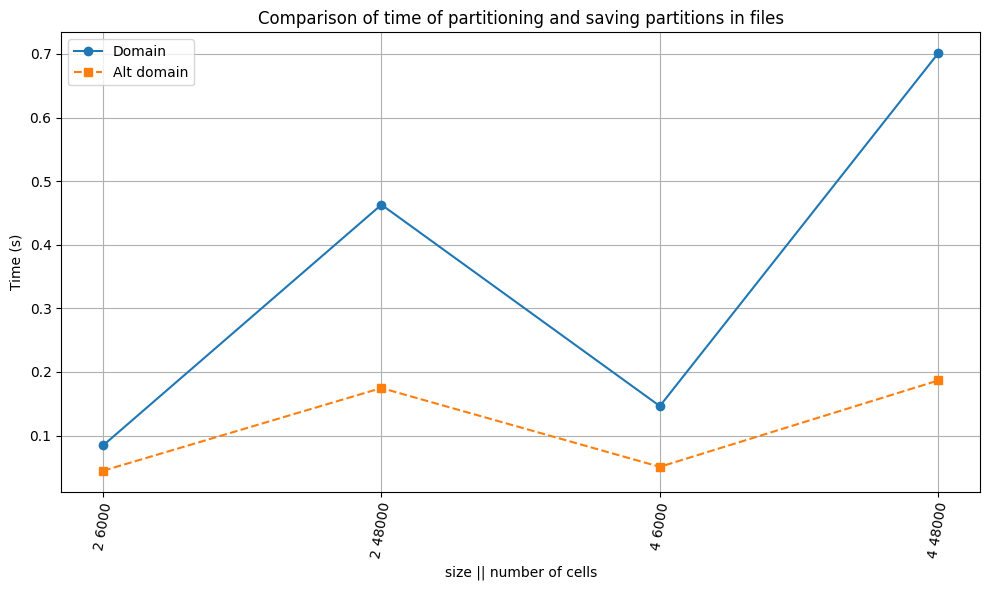

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("benchmark_results.csv")

# Split into columns
x = data[:, 0].astype(int)
y = data[:, 1].astype(int)
timeA = data[:, 2]
timeB = data[:, 3]

# Create string labels like "2 6000"
labels = [f"{xi} {yi}" for xi, yi in zip(x, y)]

# Create plot
plt.figure(figsize=(10, 6))

# Plot timeA and timeB
plt.plot(labels, timeA, 'o-', label="Domain")
plt.plot(labels, timeB, 's--', label="Alt domain")

# Customize
plt.title("Comparison of time of partitioning and saving partitions in files")
plt.xlabel("size || number of cells")
plt.ylabel("Time (s)")
plt.legend()
plt.xticks(rotation=80)
plt.tight_layout()
plt.grid(True)

# Show plot
plt.show()


In [9]:
import numpy as np
data = np.loadtxt("benchmark_results.csv")

# Split into columns
parts = data[:, 0].astype(int)
nb_cells = data[:, 1].astype(int)
timeDomain = data[:, 2]
ramUsageDomain = data[:, 3]
timeAltDomain = data[:, 4]
ramUsageAltDomain = data[:, 5]


ValueError: could not convert string '355.79MB' to float64 at row 0, column 4.

In [22]:
# Load data from file
with open("benchmark_results.csv", "r") as f:
    lines = f.readlines()

# Parse each line
data = []
for line in lines:
    parts = line.strip().split()
    x = int(parts[0])
    y = int(parts[1])
    timeA = float(parts[2])
    memA = float(parts[3].replace("MB", ""))
    timeB = float(parts[4])
    memB = float(parts[5].replace("MB", ""))
    data.append([x, y, timeA, memA, timeB, memB])

data = np.array(data)
data = data[np.argsort(data[:, 0])]

dic = {}
for item in data:
    part = int(item[0])
    dic.setdefault(part, []).append((item[1], item[2], item[4]))

print(dic)


{2: [(6000.0, 0.24418, 0.082632), (162000.0, 2.384023, 0.866369), (750000.0, 9.364429, 3.805189), (384000.0, 5.267615, 1.977009), (48000.0, 0.982877, 0.29381)], 4: [(384000.0, 7.443554, 2.045541), (750000.0, 12.537403, 3.927069), (48000.0, 1.512358, 0.308113), (162000.0, 3.733583, 0.906336), (6000.0, 0.359009, 0.081653)], 8: [(6000.0, 0.52329, 0.08526), (48000.0, 1.959277, 0.314507), (162000.0, 4.775324, 0.940801), (750000.0, 15.545787, 3.996084), (384000.0, 9.680037, 2.091892)], 16: [(6000.0, 0.810026, 0.09674), (750000.0, 21.26722, 4.126521), (48000.0, 2.991839, 0.340008), (162000.0, 6.960521, 0.976517), (384000.0, 13.319978, 2.178828)], 32: [(162000.0, 9.475173, 1.045033), (750000.0, 27.396375, 4.286441), (384000.0, 16.788785, 2.292972), (6000.0, 1.179577, 0.112842), (48000.0, 4.057634, 0.381872)], 64: [(6000.0, 1.8036, 0.141958), (48000.0, 5.740926, 0.442162), (162000.0, 12.864304, 1.134677), (384000.0, 23.089139, 2.43094), (750000.0, 36.179339, 4.528267)], 128: [(6000.0, 2.653657,